<a href="https://colab.research.google.com/github/jotadram6/cosmic-cat/blob/master/SensitivityChi2vsLikelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Install packages needed for root

In [0]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  binutils-common binutils-x86-64-linux-gnu libapr1 libaprutil1 libbinutils
  libserf-1-1 libsvn1
S

### 2. Mount the drive to get the root binary and untar it 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  FLUTEMI.WAV
BasicPyROOTExample.ipynb  HistogrammingInROOT.ipynb
Chi2Fitting.ipynb	  MCSimpleIntegrator.ipynb
Data5.root		  monje-a-lo-bonzo-blanco-y-negro.png
DatosParcial2		  piano-C5.wav
DatosProyectoMontecarlo   root_build_google_yikes.tar
DatosResonancia.root	  TrimmedTree.root
FFT_imagen.ipynb	  TTreeExcercise.ipynb
FFT.ipynb


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K May 13 16:29 sample_data
drwx------  5 root root 4.0K May 20 20:21 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [0]:
import ROOT
from ROOT import gROOT 

Welcome to JupyROOT 6.14/04


In [0]:
from random import randint,gauss
import time

In [0]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 0, 0, 1000, 1000 )
c1.SetFillColor( 0 )

In [0]:
BackgroundModel = ROOT.TH2F( 'bkg', 'My background model', 20, 0, 1000, 15, 30, 330)
F2D = ROOT.TF2("f2","([0]*expo(x,[1..2]))*([3]*expo(y,[4..5])+[6])",0,1000,30,330) #TF2("f2","sin(x)*sin(y)/(x*y)",0,5,0,5);
F2D.SetParameters(100.0,0.0,gauss(-0.0005,0.0002),100.0,0.0,gauss(-0.001,0.0005),100.0)
BackgroundEvents=10000
BackgroundModel.FillRandom("f2",BackgroundEvents)
BackgroundModel.Scale(200./BackgroundEvents)

Warning in <TROOT::Append>: Replacing existing TH1: bkg (Potential memory leak).


In [0]:
SignalModel = ROOT.TH2F( 'sig', 'My signal model', 20, 0, 1000, 15, 30, 330)
signalf = ROOT.TF2("signalf", "gausn(x, [0..2])*gausn(y, [3..5])",0,1000,30,330)
mux=gauss(200,100)
sigmax=300.0
muy=gauss(170,100)
sigmay=500.0
signalf.SetParameters(1.0,mux,sigmax,1.0,muy,sigmay)
SignalEvents=int(float(BackgroundEvents)/100.)
SignalModel.FillRandom("signalf",SignalEvents)
SignalModel.Scale(20./SignalEvents)

Warning in <TROOT::Append>: Replacing existing TH1: sig (Potential memory leak).


In [0]:
##SignalModel.SetStats(0)
##SignalModel.Draw('colz')
#SignalModel.SetLineColor(2)
##c1.Update()
##gROOT.GetListOfCanvases().Draw()
##c1.SaveAs("/content/drive/Shared drives/PyROOT_in_Google/Random2DHistos/SignalSample.png")

In [0]:
BkgpSigModel = BackgroundModel.Clone("bkgpsig")
BkgpSigModel.Sumw2()
BkgpSigModel.Add(SignalModel,0.1)

True

Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created


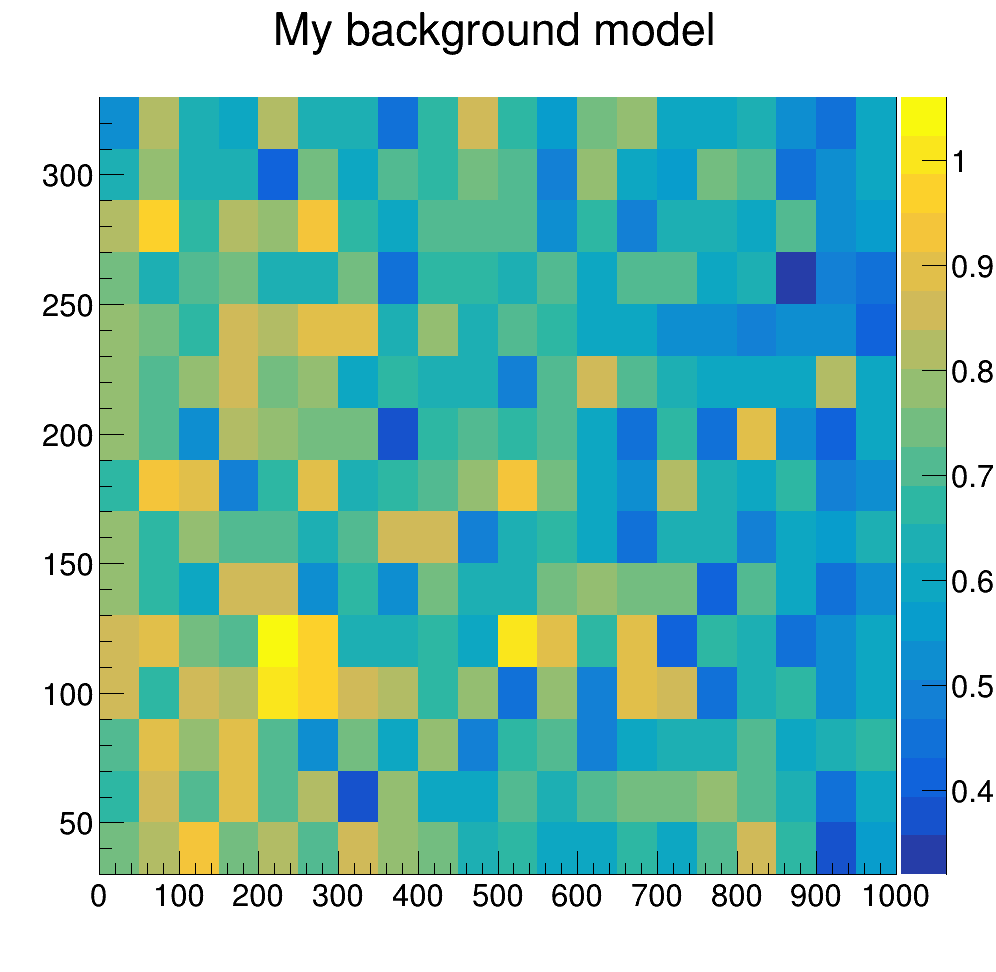

In [0]:
BkgpSigModel.SetStats(0)
#BkgpSigModel.SetMaximum(600)
BkgpSigModel.Draw("colz")
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
sys.path.append("/content/drive/Shared drives/MLHEP/")
import StatsMethods
import numpy as np

### 2D treatment

In [0]:
n=[]; b=[]; s=[]
for i in range(1,BackgroundModel.GetNbinsX()):
  for j in range(1,BackgroundModel.GetNbinsY()):
    n.append(float(BkgpSigModel.GetBinContent(BkgpSigModel.GetBin(i,j))))
    s.append(float(SignalModel.GetBinContent(SignalModel.GetBin(i,j))))
    b.append(float(BackgroundModel.GetBinContent(BackgroundModel.GetBin(i,j))))

In [0]:
MaximumObservation=StatsMethods.MaxSimpLogL(1.5,n,s,b,0.01,3.0)
print(MaximumObservation)

      fun: 247.20874834511991
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.68434189e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([0.10000029])


In [0]:
UpperLimitObserved=StatsMethods.FindUpperLimit(MaximumObservation.x[0],2.5)
print(UpperLimitObserved)

0.5555571893582057


In [0]:
ObservedChi2=StatsMethods.BinnedChi2(np.array(n),np.array(b))
ObservedPvalue=StatsMethods.Chi2pValue(ObservedChi2,len(b))

In [0]:
print(ObservedChi2/len(n),ObservedPvalue)

0.0003184903486177291 1.0


In [0]:
MinChi2V=StatsMethods.MinChi2(1.5,np.array(n),np.array(s),np.array(b),0.01,3.)
print(MinChi2V)

      fun: 3.634532130971153e-14
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.84147428e-10])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 4
   status: 0
  success: True
        x: array([0.09999998])


In [0]:
MaxMuChi2,MaxMuXChi2Pvalue = StatsMethods.FindUpperLimitChi2(np.array(n),np.array(s),np.array(b),alpha=0.05,Mumin=0.0,Mumax=30.0,Steps=1000)
print(MaxMuChi2,MaxMuXChi2Pvalue)

18.858888888888888 0.05063121765837743


### 1D approach

In [0]:
n1=[]; b1=[]; s1=[]
for i in range(1,BackgroundModel.GetNbinsX()):
  ni=0.0; si=0.0; bi=0.0
  for j in range(1,BackgroundModel.GetNbinsY()):
    ni+=float(BkgpSigModel.GetBinContent(BkgpSigModel.GetBin(i,j)))
    si+=float(SignalModel.GetBinContent(SignalModel.GetBin(i,j)))
    bi+=float(BackgroundModel.GetBinContent(BackgroundModel.GetBin(i,j)))
  n1.append(ni)
  s1.append(si)
  b1.append(bi)

In [0]:
MaximumObservation1D=StatsMethods.MaxSimpLogL(1.5,n1,s1,b1,0.01,3.0)
print(MaximumObservation1D)

      fun: 17.53974874046153
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.48689958e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 4
   status: 0
  success: True
        x: array([0.09999902])


In [0]:
UpperLimitObserved1D=StatsMethods.FindUpperLimit(MaximumObservation1D.x[0],2.5)
print(UpperLimitObserved1D)

0.6249938661371066


In [0]:
ObservedChi21D=StatsMethods.BinnedChi2(np.array(n1),np.array(b1))
ObservedPvalue1D=StatsMethods.Chi2pValue(ObservedChi21D,len(b1))

In [0]:
print(ObservedChi21D/len(n1),ObservedPvalue1D)

0.0014076339560603697 1.0


In [0]:
MinChi2V1D=StatsMethods.MinChi2(1.5,np.array(n1),np.array(s1),np.array(b1),0.01,3.)
print(MinChi2V1D)

      fun: 2.2039987312712073e-15
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.82920682e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([0.09999996])


In [0]:
MaxMuChi21D,MaxMuXChi2Pvalue1D = StatsMethods.FindUpperLimitChi2(np.array(n1),np.array(s1),np.array(b1),alpha=0.05,Mumin=0.0,Mumax=15.0,Steps=1000)
print(MaxMuChi21D,MaxMuXChi2Pvalue1D)

4.459474474474475 0.050500887073209974


### Cut and count approach

In [0]:
n0=[sum(n1)]
s0=[sum(s1)]
b0=[sum(b1)]

In [0]:
MaximumObservation0D=StatsMethods.MaxSimpLogL(1.5,n0,s0,b0,0.01,3.0)
print(MaximumObservation0D)

/content/drive/Shared drives/MLHEP/StatsMethods.py:71: RuntimeWarning: overflow encountered in power
  L1+=math.log(((((mu*s[i])+b[i])**(n[i]))/(math.factorial(math.floor(n[i]))))*(np.exp(-1*((mu*s[i])+b[i]))))


OverflowError: ignored

In [0]:
UpperLimitObserved0D=StatsMethods.FindUpperLimit(MaximumObservation0D.x[0],2.5)
print(UpperLimitObserved0D)

NameError: ignored

In [0]:
ObservedChi20D=StatsMethods.BinnedChi2(np.array(n0),np.array(b0))
ObservedPvalue0D=StatsMethods.Chi2pValue(ObservedChi20D,len(b0))
print(ObservedChi20D/len(n0),ObservedPvalue0D)

0.01927996825011231 0.8895668447923193


In [0]:
MinChi2V0D=StatsMethods.MinChi2(1.5,np.array(n0),np.array(s0),np.array(b0),0.01,3.)
print(MinChi2V0D)

      fun: 1.342824376542388e-12
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.18241902e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 4
   status: 0
  success: True
        x: array([0.09999912])


In [0]:
MaxMuChi20D,MaxMuXChi2Pvalue0D = StatsMethods.FindUpperLimitChi2(np.array(n0),np.array(s0),np.array(b0),alpha=0.05,Mumin=0.0,Mumax=15.0,Steps=1000)
print(MaxMuChi20D,MaxMuXChi2Pvalue0D)

1.6066216216216211 0.050596359176333594
